In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def backtrack1(x, z, t, y, f, df, d, alpha0=1., c=1e-3, r=0.9, maxI=1000, sig=1.):
    alpha = alpha0
    counter = 0
    fin = 0
    
    while not fin:
        
        if (f(x - alpha*d) <= f(x) - c*alpha*df(x)@d):
            fin = 1
        if (counter >= maxI): fin = 1
        alpha = r*alpha
        counter = counter + 1
        
    return alpha, counter

In [39]:
def CoordDescent(x0, z0, t, y, f, df1, df2, alpha0=1., maxI=1000, eps=1e-3, crit='abserrorx', c=1e-3, r=0.9, sig=1.):
    iters = 0
    fin = 0
    convergence = 0
    x = x0.copy()
    z = z0.copy()
    n = x.shape[0]

    xk = []
    zk = []
    fk = []
    df1k = []
    df2k = []
    errk = []
    #bk = [0]
    xk.append(x)
    zk.append(z)
    fk.append(f(t, x, sig, z, y))
    df1k.append(df1(t, x, sig, z, y))
    df2k.append(df2(t, x, sig, z, y))
    errk.append(np.linalg.norm(xk, 1))
    alpha = alpha0
    
    while not fin:
        #alpha, ct = backtracking(x, f, df, gr, alpha0, c, r)   
        
        #step 1: mus
        oldx = x
        gr1 = df1(t, x, sig, z, y)
        x = oldx - alpha*gr1
        fx = f(t, x, sig, z, y)
        dfx1 = df1(t, x, sig, z, y)
        
        #step 1: coefs
        oldz = z
        gr2 = df2(t, x, sig, z, y)
        z = oldz - alpha*gr2
        fx = f(t, x, sig, z, y)
        dfx2 = df2(t, x, sig, z, y)
        
        iters += 1
        xk.append(x)
        zk.append(z)
        fk.append(f(t, x, sig, z, y))
        df1k.append(df1(t, x, sig, z, y))
        df2k.append(df2(t, x, sig, z, y))
        #bk.append(ct)
        
        if (crit == 'abserrorx'):
            error = np.linalg.norm(oldx-x)
        elif (crit == 'relerrorx'):
            error = np.linalg.norm(oldx-x)/np.linalg.norm(x)
        elif (crit == 'relerrorf'):
            foldx = f(t, x, sig, z, y)
            error = np.abs(foldx-fx)/np.abs(fx)
        elif (crit == 'normdf'):
            error = np.linalg.norm(dfx1)
        else:
            error = -1.
            fin = 1
        if (error < eps):
            fin = 1
            convergence = 1
        errk.append(error)      
        if(iters >= maxI): fin = 1

    bestx = x
    bestz = z
    xk = np.array(xk)
    zk = np.array(zk)
    fk = np.array(fk)
    df1k = np.array(df1k)
    df2k = np.array(df2k)
    errk = np.array(errk)
    return [bestx, bestz, xk, zk, fk, df1k, df2k, errk, convergence, iters]

## Functions

In [40]:
def ker(x, mu, sig):
    f = np.exp(-(x-mu)**2/(2.*sig**2))
    return f

def dker1(x, mu, sig):
    df = - ker(x,mu,sig) * ((x-mu)**2/(2.*sig**2))
    return df

def dker2(x, mu, sig):
    df = ker(x,mu,sig)
    return df

In [41]:
def F(x, mu, sig, c):
    f = 0.
    for i in range(0, len(mu)):
        f = f + c[i] * ker(x, mu[i], sig)
    return f

def dF1(x, mu, sig, c):
    df = 0.
    for i in range(0, len(mu)):
        df = df - (c[i]*((x-mu[i])**2/(2.*sig**2))) * ker(x, mu[i], sig)
    return df

def dF2(x, mu, sig, c):
    df = 0.
    for i in range(0, len(mu)):
        df = df + c[i] * ker(x, mu[i], sig)
    return df

In [42]:
def E(x, mu, sig, c, y):
    f = 0.
    for i in range(0, len(x)):
        f = f + (F(x[i], mu, sig, c) - y[i])**2
    return f

def dE1(x, mu, sig, c, y):
    df = 0.
    for i in range(0, len(x)):
        df = df + 2.* (F(x[i], mu, sig, c) - y[i]) * dF1(x[i], mu, sig, c)
    return df
    
def dE2(x, mu, sig, c, y):
    df = 0.
    for i in range(0, len(x)):
        df = df + 2.* (F(x[i], mu, sig, c) - y[i]) * dF2(x[i], mu, sig, c)
    return df

## Test

In [43]:
t = np.linspace(0, 10, 101)
y = np.cos(2.1*t - 3.4) + 3.*np.sin(0.7*t + 5.1)

In [44]:
k = 10
t0 = t[0]
tf = t[-1]
dh = 1. * (tf - t0) / k

mu0 = np.linspace(t0, t0 + (k-1)*dh, k, endpoint=True) + 0.5*dh

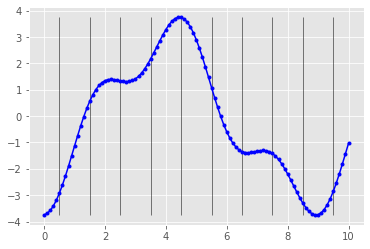

In [45]:
plt.figure()
plt.style.use('ggplot')
plt.plot(t, y, 'b.')
plt.plot(t, y, 'b-')
plt.vlines(mu0, ymin=y.min(), ymax=y.max(), lw=0.5)
plt.show()

In [46]:
mu0

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [60]:
c0 = np.random.rand(k)

alpha0 = 0.01
maxI = 10000
eps = 1e-4
c = 1e-2
r = 0.5
sig = 1.

In [61]:
mu, coef, xk, zk, fk, df1k, df2k, errk, conv, it = CoordDescent(mu0, c0, t, y, E, dE1, dE2, alpha0, maxI, eps, 'abserrorx', c, r, sig)

In [62]:
print(conv, it)

1 134


In [63]:
mu

array([ 9.24907292, 10.24907292, 11.24907292, 12.24907292, 13.24907292,
       14.24907292, 15.24907292, 16.24907292, 17.24907292, 18.24907292])

In [64]:
coef

array([ 0.04828853, -0.12188424,  0.08160512,  0.27354458, -0.287729  ,
       -0.41317846, -0.22074441,  0.29130507,  0.02216692, -0.18968176])

#### $\lambda = 1$

In [67]:
yhat = np.zeros(y.shape)
for i in range(0, len(y)):
    yhat[i] = F(t[i], mu, sig, coef)

In [69]:
yhat

array([ 1.28186810e-20,  3.21623128e-20,  7.98927835e-20,  1.96482604e-19,
        4.78406257e-19,  1.15325593e-18,  2.75239359e-18,  6.50356178e-18,
        1.52141526e-17,  3.52370786e-17,  8.07992820e-17,  1.83430024e-16,
        4.12276399e-16,  9.17405741e-16,  2.02110621e-15,  4.40830138e-15,
        9.51935672e-15,  2.03515648e-14,  4.30766139e-14,  9.02689696e-14,
        1.87278612e-13,  3.84671663e-13,  7.82247214e-13,  1.57488600e-12,
        3.13909798e-12,  6.19456199e-12,  1.21022346e-11,  2.34082497e-11,
        4.48249498e-11,  8.49800866e-11,  1.59499710e-10,  2.96378544e-10,
        5.45225794e-10,  9.92995511e-10,  1.79043172e-09,  3.19599417e-09,
        5.64793750e-09,  9.88114353e-09,  1.71141544e-08,  2.93448447e-08,
        4.98119154e-08,  8.37059471e-08,  1.39250658e-07,  2.29325251e-07,
        3.73865627e-07,  6.03369134e-07,  9.63937371e-07,  1.52442613e-06,
        2.38643025e-06,  3.69801000e-06,  5.67225434e-06,  8.61195824e-06,
        1.29418384e-05,  

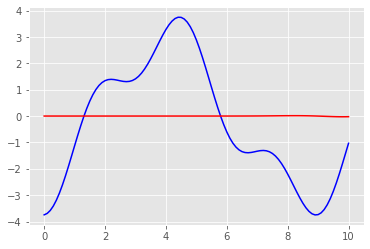

In [70]:
plt.figure()
plt.style.use('ggplot')
plt.plot(t, y, 'b-')
plt.plot(t, yhat, 'r-')
plt.show()

In [ ]:
print(conv, it)

In [ ]:
sol1

In [ ]:
print(max(bk))

#### $\lambda = 5$

In [ ]:
x0 = y.mean()*np.ones(y.shape)

lamb = 5.

alpha0 = 0.1
maxI = 10000
eps = 1e-2
c = 1e-4
r = 0.5

In [ ]:
sol2, xk, fk, dfk, errk, bk, conv, it = lineSearch(x0, E, dE, alpha0, maxI, eps, 'normdf', c, r)

In [ ]:
print(conv, it)

In [ ]:
sol2

In [ ]:
print(max(bk))

#### $\lambda = 100$

In [ ]:
x0 = y.mean()*np.ones(n)

lamb = 10.

alpha0 = 0.1
maxI = 10000
eps = 1e-4
c = 1e-2
r = 0.5

In [ ]:
sol3, xk, fk, dfk, errk, bk, conv, it = lineSearch(x0, E, dE, alpha0, maxI, eps, 'normdf', c, r)

In [ ]:
print(conv, it)

In [ ]:
sol3

In [ ]:
print(max(bk))

In [ ]:
t = np.arange(0, n)
plt.figure(figsize=(15,6))
plt.plot(t, y, 'k-', lw=1., label='data')
plt.plot(t, sol0, 'r-', lw=1, label=r'$\lambda = 0$')
plt.plot(t, sol1, 'b-', lw=2, label=r'$\lambda = 1$')
plt.plot(t, sol2, 'g-', lw=2, label=r'$\lambda = 5$')
#plt.plot(t, sol3, 'r-', lw=2, label=r'$\lambda = 10$')
plt.legend()
plt.show()

In [ ]:
np.diff(y).shape

In [83]:
aa = np.array([1, 2, 3])
bb = np.array([2, 4, 6, 8])

In [84]:
X, Y = np.meshgrid(bb, aa)

In [85]:
X

array([[2, 4, 6, 8],
       [2, 4, 6, 8],
       [2, 4, 6, 8]])

In [86]:
Y

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [88]:
X.sum(0)

array([ 6, 12, 18, 24])